In [1]:
import joblib

# Load the model with specified encoding
model = joblib.load('learn_model.joblib')

d:\Study\EPICS\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
Train= pd.read_csv('Train.csv')

In [3]:
damage = Train.Label.unique()

In [7]:
test_dl = model.dls.test_dl(r"id_00stp9t6m6.jpg")
preds , _ = model.get_preds(dl=test_dl)

In [8]:
from fastai.vision.all import *
preds = F.softmax(preds, dim=1)

blast: 0.5684
healthy: 0.2175
brown: 0.2141


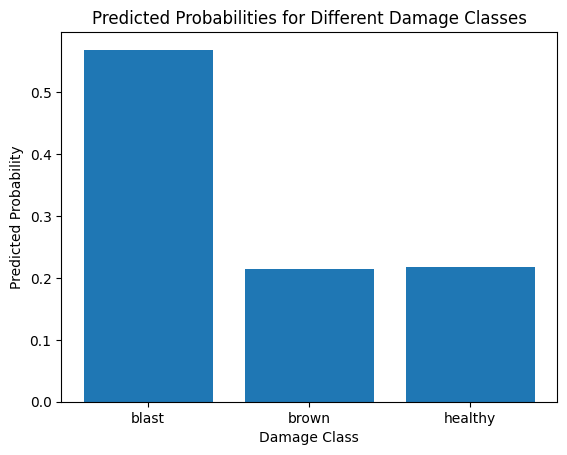

In [9]:
# Assuming 'damage' is the target variable in your model
damage_classes = model.dls.vocab
damage_labels = list(damage_classes)

# Get the predicted probabilities for each class
predicted_probabilities = preds[0].tolist()

# Create a dictionary to associate each damage class with its predicted probability
prediction_dict = dict(zip(damage_labels, predicted_probabilities))

# Sort the dictionary based on probabilities in descending order
sorted_predictions = sorted(prediction_dict.items(), key=lambda x: x[1], reverse=True)

# Display the predictions
for damage_class, probability in sorted_predictions:
    print(f"{damage_class}: {probability:.4f}")

import matplotlib.pyplot as plt

plt.bar(damage_labels, predicted_probabilities)
plt.xlabel('Damage Class')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities for Different Damage Classes')
plt.show()